In [107]:
import pandas as pd
import numpy as np
import numpy.random as nr
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
from sklearn import preprocessing

%matplotlib inline

## Import the cross-country dataset on key economic variables. 

In [108]:
data = pd.read_csv('ClusterAnalysis.csv')
data.head()
data = data.dropna()
print(data.shape)
print(list(data.columns))

(38, 10)
['Countries', 'Development', 'Hemisphere', 'GDPpercapitagrowth ', 'Capitalformation', 'Populationgrowth', 'TradeOpenness', 'HumanCapital ', 'Inflation', 'Unemployment']


In [109]:
data.head()

,Countries,Development,Hemisphere,GDPpercapitagrowth,Capitalformation,Populationgrowth,TradeOpenness,HumanCapital,Inflation,Unemployment
0,Afghanistan,LDC,NH,1.785902,26.451373,1.218943,32.352110,3.213360,10.135841,6.1052
1,Algeria,LDC,NH,1.710981,28.443509,1.586853,31.656422,3.232605,9.487666,5.7836
2,Antigua and Barbuda,DC,NH,1.619373,29.000399,1.667536,30.374779,3.251965,11.351820,7.1626
3,Argentina,DC,SH,-3.435314,26.592459,1.250548,29.222146,3.271441,10.038911,9.9614
4,Armenia,LDC,NH,3.403727,26.079925,1.132222,28.589242,3.291033,3.960396,8.9868


In [110]:
data.dtypes

Countries               object
Development             object
Hemisphere              object
GDPpercapitagrowth     float64
Capitalformation       float64
Populationgrowth       float64
TradeOpenness          float64
HumanCapital           float64
Inflation              float64
Unemployment           float64
dtype: object

In [111]:
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)

categorical_columns = ['Countries','Development', 'Hemisphere']
for col in categorical_columns:
    temp = encode_string(data[col])      

In [112]:
Features = np.array(data[['Capitalformation', 'Populationgrowth', 'TradeOpenness', 'HumanCapital ', 'Inflation', 'Unemployment']])
Labels =  np.array(data[['GDPpercapitagrowth ']]) 
scaler = StandardScaler()
Features = scaler.fit_transform(Features)
Labels = scaler.fit_transform(Labels) 
data = np.concatenate((Features,Labels), 1)
print(data.shape)   

(38, 7)


## We are going to apply K-means clustering starting from 2 to 6 clusters. Then we will compute the WCSS, BCSS and the Sillohette coefficient to judge the best K means cluster model. 

In [116]:
# Apply K-means clustering
# A dictionary is defined for mapping cluster assignment numbers to colors for the assignment visualization.
# A K=2 K-means cluster model is defined.
# The data is fit to the cluster model and assignments are computed.

nr.seed(2233)
col_dic = {0:'blue',1:'green',2:'orange',3:'gray',4:'magenta',5:'black'}
kmeans_2 = KMeans(n_clusters=2, random_state=0)
assignments_km2 = kmeans_2.fit_predict(data)
assign_color_km2 = [col_dic[x] for x in assignments_km2]

In [117]:
# Compute the cluster assignments for the K=3 model. 

nr.seed(4455)
kmeans_3 = KMeans(n_clusters=3, random_state=0)
assignments_km3 = kmeans_3.fit_predict(data)
assign_color_km3 = [col_dic[x] for x in assignments_km3] 

In [118]:
# Compute the cluster assignments for the K=4 model. 

nr.seed(223)
kmeans_4 = KMeans(n_clusters=4, random_state=0)
assignments_km4 = kmeans_4.fit_predict(data)
assign_color_km4 = [col_dic[x] for x in assignments_km4] 

In [119]:
# Compute the cluster assignments for the K=5 model. 

nr.seed(4443)
kmeans_5 = KMeans(n_clusters=5, random_state=0)
assignments_km5 = kmeans_5.fit_predict(data)
assign_color_km5 = [col_dic[x] for x in assignments_km5] 

In [120]:
# Compute the cluster assignments for the K=6 model. 

nr.seed(2288)
kmeans_6 = KMeans(n_clusters=6, random_state=0)
assignments_km6 = kmeans_6.fit_predict(data)
assign_color_km6 = [col_dic[x] for x in assignments_km6]

## Selecting the best model. To so we compute and compare the within cluster sum of squares (WCSS), between cluster sum of squares (BCSS) and silhouette coefficient (SC) metrics. 

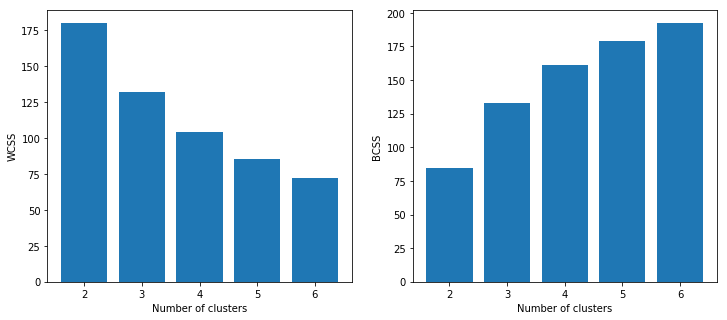

In [121]:
km_models = [kmeans_2, kmeans_3, kmeans_4, kmeans_5, kmeans_6]

def plot_WCSS_km(km_models, samples):
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    
    ## Plot WCSS
    wcss = [mod.inertia_ for mod in km_models]
    n_clusts = range(2,len(wcss) + 2)
    ax[0].bar(n_clusts, wcss)
    ax[0].set_xlabel('Number of clusters')
    ax[0].set_ylabel('WCSS')
    
    ## Plot BCSS
    ## Compute BCSS as TSS - WCSS 
    n_1 = (float(samples.shape[0]) * float(samples.shape[1])) - 1.0
    tss = n_1 * np.var(samples)
    bcss = [tss - x for x in wcss]
    ax[1].bar(n_clusts, bcss)
    ax[1].set_xlabel('Number of clusters')
    ax[1].set_ylabel('BCSS')
    plt.show()
    

plot_WCSS_km(km_models, data)

## Compute and display the Sillohette Curve.   

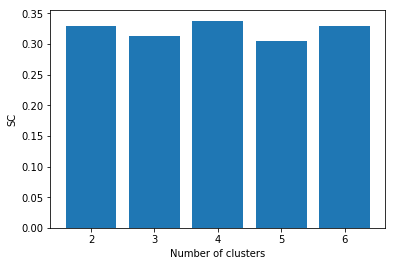

In [122]:
assignment_list = [assignments_km2, assignments_km3, assignments_km4, assignments_km5, assignments_km6]

def plot_sillohette(samples, assignments, x_lab = 'Number of clusters'):
    silhouette = [silhouette_score(samples, a) for a in assignments]
    n_clusts = range(2, len(silhouette) + 2)
    plt.bar(n_clusts, silhouette)
    plt.xlabel(x_lab)
    plt.ylabel('SC')
    plt.show()

plot_sillohette(data, assignment_list)

## Based on the above metrics it appear the k=6 means clusteris the best one. 

## Now we are going to hierarchical clustering by using the agglomerative method. 

In [123]:
# Compute a 2 cluster agglomerative model and displays the cluster assignments. 

nr.seed(2233)
agc_2 = AgglomerativeClustering(n_clusters=2)
assignments_ag2 = agc_2.fit_predict(data)
assign_color_ag2 = [col_dic[x] for x in assignments_ag2]

In [124]:
# Compute a 3 cluster agglomerative model and displays the cluster assignments. 

nr.seed(4433)
agc_3 = AgglomerativeClustering(n_clusters=3)
assignments_ag3 = agc_3.fit_predict(data)
assign_color_ag3 = [col_dic[x] for x in assignments_ag3]

In [125]:
# Compute a 4 cluster agglomerative model and displays the cluster assignments.  

nr.seed(2663)
agc_4 = AgglomerativeClustering(n_clusters=4)
assignments_ag4 = agc_4.fit_predict(data)
assign_color_ag4 = [col_dic[x] for x in assignments_ag4]

In [126]:
# Compute a 5 cluster agglomerative model and displays the cluster assignments.  

nr.seed(6233)
agc_5 = AgglomerativeClustering(n_clusters=5)
assignments_ag5 = agc_5.fit_predict(data)
assign_color_ag5 = [col_dic[x] for x in assignments_ag5]

In [127]:
# Compute a 6 cluster agglomerative model and displays the cluster assignments.  

nr.seed(2288)
agc_6 = AgglomerativeClustering(n_clusters=6)
assignments_ag6 = agc_6.fit_predict(data)
assign_color_ag6 = [col_dic[x] for x in assignments_ag6] 

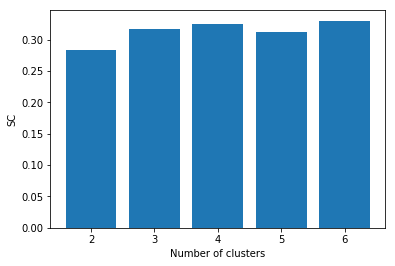

In [128]:
# Compute and display the the Sillohette Curve for the agglomerative clustering models. 

assignment_list = [assignments_ag2, assignments_ag3, assignments_ag4, assignments_ag5, assignments_ag6]
plot_sillohette(data, assignment_list)

## Again with the agglomerative clustering models, the k = 6 appears to be the best cluster model. 